# Regressione Lineare Semplice

Importiamo il dataset direttamente dalla repository ufficiale dell'UCI all'interno di un dataset.
Trattandosi di una regressione lineare semplice utilizzeremo soltanto la proprietà collegata al numero di stanze (RM - colonna 5) per predirre il valore medio (MEDV - colonna 13). Le colonne del dataset sono divise da un numero variabile di spazi, in questi casi dobbiamo usare come separatore \s+.

In [2]:
import numpy as np
import pandas as pd
boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", 
                     sep='\s+', usecols=[5,13], 
                     names=["RM", "MEDV"])
boston.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [3]:
X = boston.drop("MEDV", axis=1).values
Y = boston["MEDV"].values

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

from sklearn.linear_model import LinearRegression

ll = LinearRegression()
# costruisce il modello
ll.fit(X_train, Y_train)
# esegue la previsione
Y_pred = ll.predict(X_test)

In [5]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)

43.68161834009488

## Valutazione del modello

Introduciamo un ulteriore metrica per valutare il nostro modello: **il coefficente di determinazione (R^2)**.

in pratica R^2 è una versione standardizzata del MSE che torna un punteggio compreso tra 0 e 1 per il train set, mentre per il test set può assumere anche valori negativi. 
**NOTA BENE** R^2 non è una funzione di costo, ma di punteggio, un valore di 1 vuol dire che la predizione del modello è sempre corretta ( cosa improbabile in casi reali ). Quindi tanto più vicino ad 1 è l'R2 tanto migliore è il modello.
* **R2_score < 0.3** il modello è inutile.
* **0.3 < R2_score < 0.5** il modello è scarso.
* **0.5 < R2_score < 0.7** il modello è discreto.
* **0.7 < R2_score < 0.9** il modello è buono.
* **0.9 < R2_score < 1** il modello è ottimo.
* **R2_score = 1** molto probabilmente c'è un errore nel modello.


In [6]:
from sklearn.metrics import r2_score

r2_score(Y_test, Y_pred)

0.47398460039317136

Il punteggio non è così male per un modello così semplice, proviamo a visualizzare i coefficenti (bias e peso) che il nostro modello ha imparato disegnando la retta da questi rappresentata in un grafico in 2 dimensioni.

Peso di RM: 9.508002656834291
Bias: -37.109604435158374


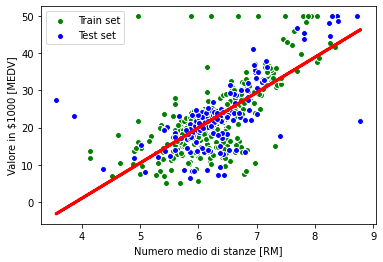

In [10]:
import matplotlib.pyplot as plt

print("Peso di RM: "+ str(ll.coef_[0]))
print("Bias: "+str(ll.intercept_))

plt.scatter(X_train, Y_train, c="green",  edgecolor='white', label="Train set")
plt.scatter(X_test, Y_test, c="blue",  edgecolor='white', label="Test set")

# Nomi delle assi
plt.xlabel('Numero medio di stanze [RM]')
plt.ylabel('Valore in $1000 [MEDV]')

# Posizioniamo la legenda
plt.legend(loc='upper left')

# Disegniamo la retta che approssima i dati
plt.plot(X_test, Y_pred, color='red', linewidth=3)

La retta approssima i dati abbastanza bene, l'errore alto è dato in gran parte dagli outliers, ovvero dai valori che si distaccano di molto dagli altri.
Per ottenere un modello più preciso, e quindi ridurre l'errore, dobbiamo aggiungere ulteriori features significative.